## Ejemplo SVM Clasificación no lineal
<div style="border-style:groove;border-width:thin;padding:10px">
En la clase anterior hemos visto un ejemplo de clasificación lineal utilizando SVM. Se usó el método LinearSVC de Scikit-Learn. Hoy vamos a ver como sería una clasificación no lineal, es decir, cuando la frontera o fronteras de decisión entre las clases no son rectas.
    </div>

<div style="border-style:groove;border-width:thin;padding:10px">
Una posible solución es generar nuevos datos de orden superior como hicimos con la regresión, sin embargo, esta solución no es generalizable con datasets grandes o con un grado alto. Por ello vamos a probar una solución más específica.
   </div>

<div style="border-style:groove;border-width:thin;padding:10px">
Debes seguir los siguientes pasos:
    <ol>
        <li>Importa el dataset make_moons que sirve para generar puntos de semicírculos intercalados. Genera X e y con la orden "X,y = make_moons(n_samples=1000,noise =0.3)".</li>
        <li>Pinta los datos con colores distintos para y=0 e y=1 usando scatter</li>
        <li>Modifica los parámetros de make_moons n_samples y noise y analiza el resultado.</li>
        <li>Genera el objeto clasificador de "Support Vectors"  con la orden "SVC(kernel='poly',degree=3,coef0=1,C=5)". kernel=poly indica que la solución va a ser polinomial.</li>
        <li>Genera los conjutos de train y de test y entrena el sistema.</li>
        <li>Saca el classification report y modifica los parámetros del SVC para ver si cambia el resultado. Prueba a poner una solución lineal (kernel='linear'), a cambiar el grado del polinomio y a cambiar el C.</li>
    </ol>
    <p>En este ejercicio hemos utilizado la clase SVC. Tenéis más información aquí:</p>
    <a>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</a>
</div>

In [68]:
from sklearn.datasets import make_moons
#1
X,y = make_moons(n_samples=200,noise=0.95  ,random_state=42)

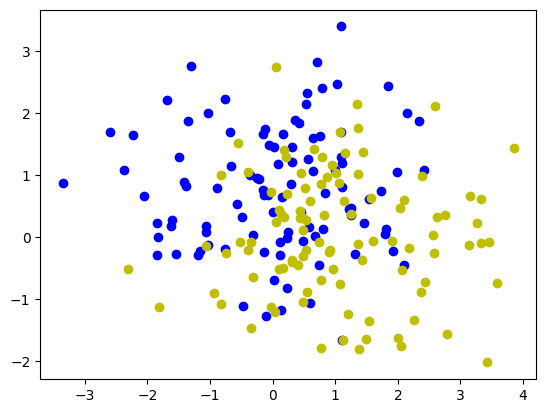

In [69]:
import numpy as np
ceros = []
unos = []
import matplotlib.pyplot as plt
for i,clase in enumerate(y):
    if clase == 0:
        ceros.append([X[:,0][i],X[:,1][i]])
    else:
        unos.append([X[:,0][i],X[:,1][i]])
ceros = np.array(ceros)
unos = np.array(unos)
plt.scatter(ceros[:,0],ceros[:,1],color='b')
plt.scatter(unos[:,0],unos[:,1],color='y')
plt.show()

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((112, 2), (38, 2))

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
svm_rbf = SVC(kernel='rbf',degree=3,coef0=1,C=1, gamma=2)
svm_rbf.fit(X_train_scaled, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",2
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [74]:
pred_rbf = svm_rbf.predict(X_test_scaled)

print("\n=== SVM RBF ===")
print("Accuracy:", accuracy_score(y_test, pred_rbf))
print(confusion_matrix(y_test, pred_rbf))
print(classification_report(y_test, pred_rbf))


=== SVM RBF ===
Accuracy: 0.9473684210526315
[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [75]:
def plot_decision_boundary(model, scaler, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.8, X[:, 0].max() + 0.8
    y_min, y_max = X[:, 1].min() - 0.8, X[:, 1].max() + 0.8

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=18)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

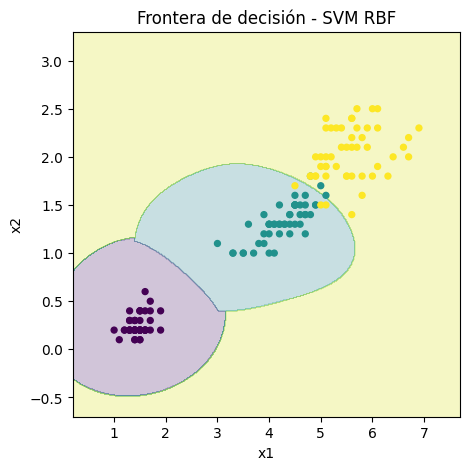

In [76]:

plot_decision_boundary(svm_rbf, scaler, X, y, "Frontera de decisión - SVM RBF")